# Simple Linear Regression

### Ordinary Least Square Method :

*Predecting Brain Weight (Dependent variable) based on Head Size (Independent variable). For Goodness of fit R Squared Error method is used.*

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [4]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b0 and b1
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b0, b1)

325.57342104944223 0.26342933948939945


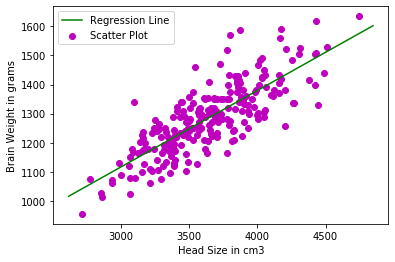

In [5]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Scatter Points
plt.scatter(X, Y, color = "m", label='Scatter Plot')
# Ploting Line
plt.plot(x, y, color = 'g', label='Regression Line')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [6]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [7]:
# R Square Method – Goodness of Fit
sumofsquares = 0
sumofresiduals = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - mean_y) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2
r2 = 1 - (sumofresiduals/sumofsquares)
print(r2)

0.6393117199570003


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
X = np.array(data['Head Size(cm^3)']).reshape(-1, 1) 
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pd = reg.predict(X)
 
# Calculating R2 Score
r2_score = reg.score(X, Y)
 
print(r2_score)

0.639311719957
